In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns

In [3]:
# Read datasets
df_item = pd.read_csv("./olist_dataset/olist_order_items_dataset.csv")
df_reviews = pd.read_csv("./olist_dataset/olist_order_reviews_dataset.csv")
df_orders = pd.read_csv("./olist_dataset/olist_orders_dataset.csv")
df_products = pd.read_csv("./olist_dataset/olist_products_dataset.csv")
df_geolocation = pd.read_csv("./olist_dataset/olist_geolocation_dataset.csv")
df_sellers = pd.read_csv("./olist_dataset/olist_sellers_dataset.csv")
df_order_pay = pd.read_csv("./olist_dataset/olist_order_payments_dataset.csv")
df_customers = pd.read_csv("./olist_dataset/olist_customers_dataset.csv")
df_category = pd.read_csv("./olist_dataset/product_category_name_translation.csv")

### Info extracted from Kaggle discussion:
*  order_id: identify products that are in the same basket.

*  product_id: identify unique products within the dataset.

* customerid:  identify unique customers within the dataset. We usually don't look that much to customers, that is because Olist sells through marketplaces and we don't have to worry about customer acquisition and retention. But it is possible to create a customerid from their document numbers.

* seller_id: identify unique sellers within the dataset. In our business model multiple sellers might fulfill an order. So identifying which seller fulfilled the order might be useful as well.
'''

## Dataset

In [71]:
df_orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [73]:
df_item.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [74]:
df_products.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [4]:
# Checking number of orders and customers
print("Total number of orders :",df_orders['order_id'].nunique())
print("Total Number of customers:",df_orders['customer_id'].nunique())

Total number of orders : 99441
Total Number of customers: 99441


In [11]:
# Checking columns 
print("Orders cols \n", df_orders.columns, "\n")
print("Items cols \n", df_item.columns, "\n")
print("Products cols \n", df_products.columns)

Orders cols 
 Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object') 

Items cols 
 Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object') 

Products cols 
 Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')


## Merging datasets

In [13]:
orders_items = pd.merge(df_orders, df_item, on='order_id')
orders_items.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76


In [14]:
subset_products = df_products.drop(['product_name_lenght', 'product_description_lenght'], axis='columns')
subset_products.head(2)

,product_id,product_category_name,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,1000.0,30.0,18.0,20.0


In [15]:
orders_items_prods = pd.merge(orders_items, subset_products, on='product_id')
orders_items_prods.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,4.0,500.0,19.0,8.0,13.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,4.0,500.0,19.0,8.0,13.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,4.0,500.0,19.0,8.0,13.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,utilidades_domesticas,4.0,500.0,19.0,8.0,13.0
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,1.0,400.0,19.0,13.0,19.0


In [16]:
# New shape of merge
orders_items_prods.shape

(112650, 20)

## Describing data

In [17]:
# Descriptive analysis for price shipping and other numeric columns
orders_items_prods[['price', 'freight_value', 'product_weight_g', 'product_length_cm']].describe()

,price,freight_value,product_weight_g,product_length_cm
count,112650.000000,112650.000000,112632.000000,112632.000000
mean,120.653739,19.990320,2093.672047,30.153669
std,183.633928,15.806405,3751.596884,16.153449
min,0.850000,0.000000,0.000000,7.000000
25%,39.900000,13.080000,300.000000,18.000000
50%,74.990000,16.260000,700.000000,25.000000
75%,134.900000,21.150000,1800.000000,38.000000
max,6735.000000,409.680000,40425.000000,105.000000


In [18]:
# Check delivering status
df_orders.groupby('order_status')['order_id'].nunique().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

## Missing data

In [19]:
missing = pd.DataFrame({'missing count': orders_items_prods.isnull().sum(),
                        'dtype': orders_items_prods.dtypes,
                        'missing %': (orders_items_prods.isnull().sum()/orders_items_prods.shape[0])*100})
missing.head(25)

,missing count,dtype,missing %
order_id,0,object,0.000000
customer_id,0,object,0.000000
order_status,0,object,0.000000
order_purchase_timestamp,0,object,0.000000
order_approved_at,15,object,0.013316
order_delivered_carrier_date,1194,object,1.059920
order_delivered_customer_date,2454,object,2.178429
order_estimated_delivery_date,0,object,0.000000
order_item_id,0,int64,0.000000
product_id,0,object,0.000000


In [20]:
# Fill missing data on numeric columns
numeric_cols = ['product_photos_qty','product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

for col in numeric_cols:
                orders_items_prods[col] = orders_items_prods[col].fillna(value=0)

# Filling missing data on product_category_name col
orders_items_prods['product_category_name'] = orders_items_prods['product_category_name'].fillna(value='no_info')

In [21]:
# List of product
orders_items_prods['product_category_name'].unique()

array(['utilidades_domesticas', 'perfumaria', 'automotivo', 'pet_shop',
       'papelaria', 'no_info', 'moveis_decoracao', 'moveis_escritorio',
       'ferramentas_jardim', 'informatica_acessorios', 'cama_mesa_banho',
       'brinquedos', 'construcao_ferramentas_construcao', 'telefonia',
       'beleza_saude', 'eletronicos', 'bebes', 'cool_stuff',
       'relogios_presentes', 'climatizacao', 'esporte_lazer',
       'livros_interesse_geral', 'eletroportateis', 'alimentos',
       'malas_acessorios', 'fashion_underwear_e_moda_praia',
       'artigos_de_natal', 'fashion_bolsas_e_acessorios',
       'instrumentos_musicais', 'construcao_ferramentas_iluminacao',
       'livros_tecnicos', 'construcao_ferramentas_jardim',
       'eletrodomesticos', 'market_place', 'agro_industria_e_comercio',
       'artigos_de_festas', 'casa_conforto', 'cds_dvds_musicais',
       'industria_comercio_e_negocios', 'consoles_games', 'moveis_quarto',
       'construcao_ferramentas_seguranca', 'telefonia_fixa', 'b

In [22]:
# Recheck missing data
missing = pd.DataFrame({'missing count': orders_items_prods.isnull().sum(),
                        'dtype': orders_items_prods.dtypes,
                        'missing %': (orders_items_prods.isnull().sum()/orders_items_prods.shape[0])*100})
missing.head(25)

,missing count,dtype,missing %
order_id,0,object,0.000000
customer_id,0,object,0.000000
order_status,0,object,0.000000
order_purchase_timestamp,0,object,0.000000
order_approved_at,15,object,0.013316
order_delivered_carrier_date,1194,object,1.059920
order_delivered_customer_date,2454,object,2.178429
order_estimated_delivery_date,0,object,0.000000
order_item_id,0,int64,0.000000
product_id,0,object,0.000000


# Visualization

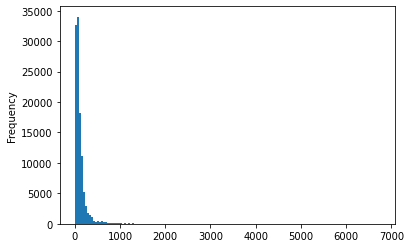

In [23]:
# Visualizing price
orders_items_prods['price'].plot(kind='hist',bins=150)

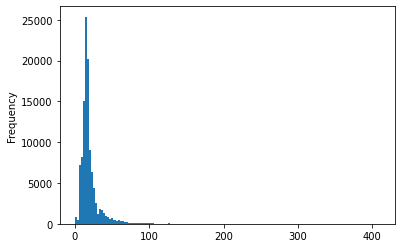

In [24]:
orders_items_prods['freight_value'].plot(kind='hist',bins=150)


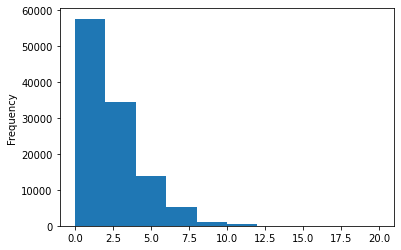

In [25]:
orders_items_prods['product_photos_qty'].plot(kind='hist',bins=10)

In [27]:
# Group dataser by categories 
info = orders_items_prods.groupby('product_category_name').count().reset_index()
info.sort_values('order_id').head(5)

,product_category_name,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
68,seguros_e_servicos,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
37,fashion_roupa_infanto_juvenil,8,8,8,8,8,7,7,8,8,8,8,8,8,8,8,8,8,8,8
61,pc_gamer,9,9,9,9,9,8,8,9,9,9,9,9,9,9,9,9,9,9,9
46,la_cuisine,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
17,cds_dvds_musicais,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14


Text(0.5, 0, 'Orders')

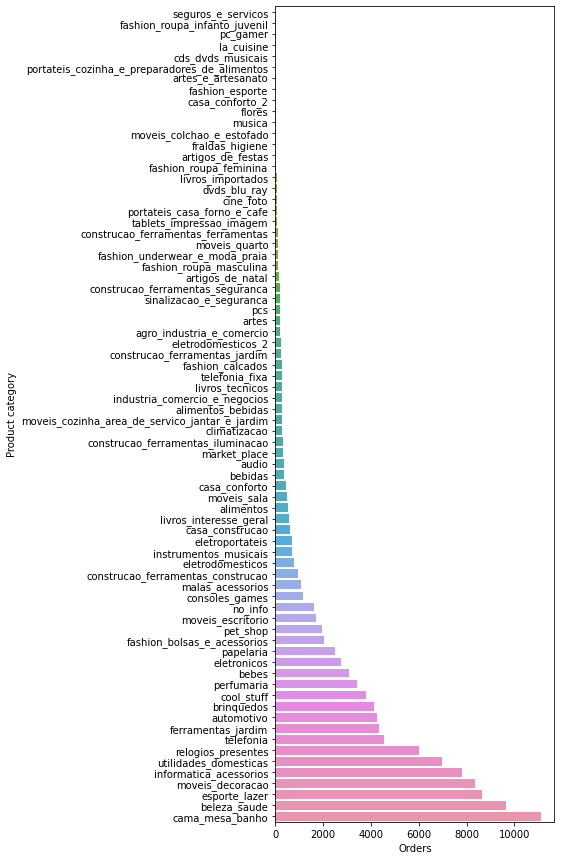

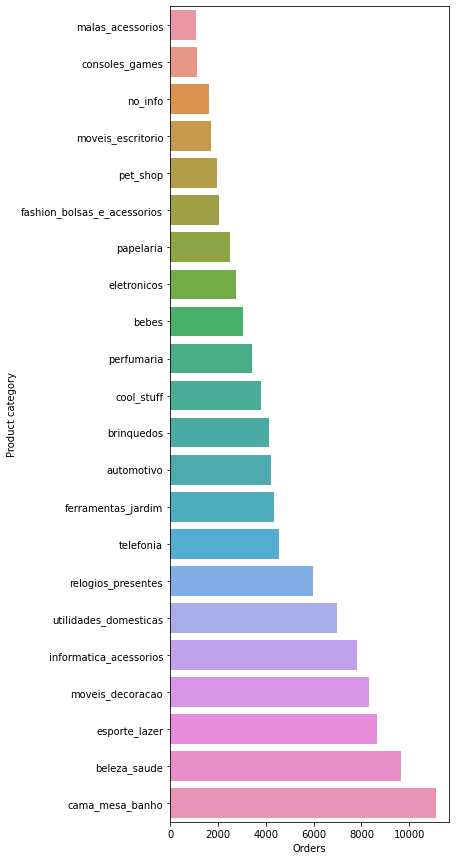

In [30]:
# Plotting the 10 most bought products categories:
info = orders_items_prods.groupby('product_category_name').count().reset_index().sort_values('order_id')

plt.figure(figsize=(5,15))
sns.barplot(y='product_category_name', x='order_id', data=info)
plt.ylabel('Product category')
plt.xlabel('Orders')

# Data slice
plt.figure(figsize=(5,15))
sns.barplot(y='product_category_name', x='order_id', data=info[info['order_id']>1000])
plt.ylabel('Product category')
plt.xlabel('Orders')

[Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '6'),
 Text(0, 0, '10'),
 Text(0, 0, '15'),
 Text(0, 0, '21'),
 Text(0, 0, '28'),
 Text(0, 0, '36'),
 Text(0, 0, '45'),
 Text(0, 0, '55'),
 Text(0, 0, '66'),
 Text(0, 0, '78'),
 Text(0, 0, '91'),
 Text(0, 0, '105'),
 Text(0, 0, '120'),
 Text(0, 0, '210'),
 Text(0, 0, '231')]

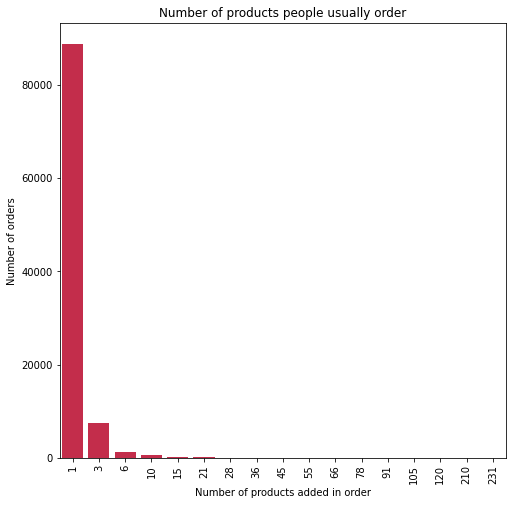

In [32]:
# Plot number of orders by customer
number_orders = orders_items_prods.groupby('order_id')['order_item_id'].aggregate('sum').reset_index()
number_orders = number_orders['order_item_id'].value_counts()
number_orders.values

plt.figure(figsize=(8,8))
ax=sns.barplot(x=number_orders.index,y=number_orders.values, color='crimson')
ax.set_xlabel("Number of products added in order")
ax.set_ylabel("Number of orders")
ax.set_title("Number of products people usually order")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

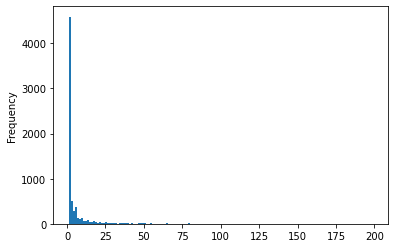

In [40]:
# The MEAN amount of money spent per order
number_orders = orders_items_prods.groupby('order_id')['price'].aggregate('mean').reset_index()
number_orders = number_orders['price'].value_counts()
number_orders[number_orders<200].plot(kind='hist',bins=150)

# This plotting is misleading, because was groupped unique values not the "mean of values between 59,00 to 59,99"
# So, I should spent a little more time thinking to plot this correctly. Maybe categorizing data, ou plotting by state

In [42]:
# Merge dataset with order_pay
df_merge2 = pd.merge(orders_items_prods, df_order_pay, on='order_id')
df_merge2.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name', 'product_photos_qty',
       'product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

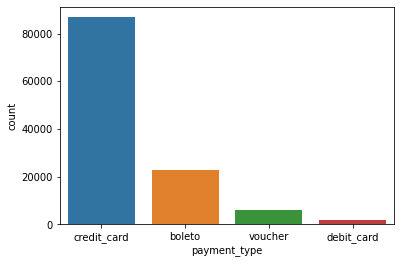

In [48]:
# Plot payment time
pay_type=df_merge2.groupby('payment_type').aggregate({'order_id':'count'}).rename(columns={'order_id':'count'}).sort_values(by='count',ascending=False).reset_index()
pay_type
sns.barplot(x='payment_type',y='count',data=pay_type)